<table class="table table-bordered">
    <tr>
        <th style="width:250px;">
            <img src='./images/RISE_FFS_2_Light BG@4x.png' style="background-color:white; width: 100%; height: 100%; padding: 20px">
        </th>
        <th style="text-align:center;">
            <h1>Introduction to Probability</h1>
            <h3>IBF TFIP</h3>
        </th>
    </tr>
</table>

<a id=contentpage></a>
### Objectives
After completing this practical exercise, you should be able to understand:
- [1: Sets](#a)
- [2: Probability](#b)
- [3: Conditional probability](#c)
- [4: Bayes' Law](#d)


In [1]:
import pandas as pd
import numpy as np

<a id="a"></a>
##  1. Sets

#### Union of two sets

In [2]:
# first set
A = {2,4,6}

# second set
B = {1,2,3}

# perform union operation using "|"
print('A Union B: ', A|B)

# alternative method using union() method
print('AUB: ', A.union(B))

# length of a set
print(f"AuB has {len(A|B)} elements") # since "2" belongs in both A and B it is should be counted only once.

A Union B:  {1, 2, 3, 4, 6}
AUB:  {1, 2, 3, 4, 6}
AuB has 5 elements


#### Intersection of two sets

In [3]:
# first set of female staff
C = {"Jane", "Kyra", "Crystal", "Sheryl"}

# second set of managers
D = {"Kyra", "Jane", "Ben", "Ken"}

# find the intersection using "&"
print("female & manager: ", C&D)

# alternatively using intersection() method
print("AnB: ", C.intersection(D))

female & manager:  {'Jane', 'Kyra'}
AnB:  {'Jane', 'Kyra'}


#### Difference of two sets

In [4]:
# Find the difference using "-"
print("D excluding elements of C: ", D-C)

# alternatively using difference()
print("C'nD: ", D.difference(C))

D excluding elements of C:  {'Ben', 'Ken'}
C'nD:  {'Ben', 'Ken'}


#### Check if two sets are equal

In [5]:
# Find if two sets are equivalent using "=="
if(C==D):
    print("Set C and D are equal")
else:
    print("Set C and D are not equal")

Set C and D are not equal


#### Check if two sets have any intersection

In [6]:
E = {"Cow", "Rabbit"}
if(D.isdisjoint(E)):
    print("No common elements!")

No common elements!


#### Exercises: Consider these three sets shown below:
twelve = {1,2,3,4,6,12}
eighteen = {1,2,3,6,9,18}
fifteen = {1,3,5,15}

(i) Find the common factors of all three numbers

(ii) Find the common factors of 12 and 18

(iii) Find the factors of of 15 that are not factors of 12 or 18

(iv) How many factors are there for twelve, eighteen, or fifteen? (no duplicates)

In [7]:
# factors of 12
twelve = {1,2,3,4,6,12}

# factors of 18
eighteen = {1,2,3,6,9,18}

# factors of 15
fifteen = {1,3,5,15}

# (i) find the common factors of all three numbers
print(f"common factors: ", twelve&eighteen&fifteen)

# (ii) find the common factors of 12 and 18
print(f"common factors of 12 and 18:", twelve&eighteen)

# (iii) find the factors of of 15 that are not factors of 12 or 18
print(f"factors of 15 only: ", fifteen - (eighteen|twelve))

# (iv) How many factors are there for twelve, eighteen, and fifteen?
print("{0} are factors of 12,18 or fifteen.".format(twelve|eighteen|fifteen))
print("There are {0} factors for 12,18 or fifteen.".format(len(twelve|eighteen|fifteen)))

common factors:  {1, 3}
common factors of 12 and 18: {1, 2, 3, 6}
factors of 15 only:  {5, 15}
{1, 2, 3, 4, 5, 6, 9, 12, 15, 18} are factors of 12,18 or fifteen.
There are 10 factors for 12,18 or fifteen.


<a id="b"></a>
##  2. Probability

In [8]:
np.random.seed(0)
dice = [1,2,3,4,5,6]
np.random.choice(dice)

5

In [9]:
# another way to generate random integer between (start, stop). stop value is excluded
np.random.randint(1,7)

6

###  Example 1: We can create a function to simulate the probability of obtaining a particular value from the sum of two dice.

In [10]:
# Sum of two dice.
def sum_of_two_dice(num, n):  # create a method with n as number of trials
    count = 0
    for i in range(n):
        
        if(np.random.randint(1,7) + np.random.randint(1,7)==num): # roll dice and sum them up
            count+=1   # add to count whenever the two dice matches
         
    return count / n    # find the probability = no of times it match/ total no of tries  
    

#### Probability that the sum of two dice is 3

In [11]:
x=sum_of_two_dice(3,1000)
print(x)

0.051


In [12]:
# Calculate the probability of obtaining sum of 3 P(1,2) + P(2,1)
p2 = 1/6*1/6 +1/6*1/6
print(p2)

0.05555555555555555


#### Probability that the sum of two dice is 7

In [13]:
x = sum_of_two_dice(7,1000)
print(x)

0.169


In [14]:
# calculate the probability of obtaining 7 (1&6)+(2&5)+(3&4)+(4&3)+(5&2)+(6&1)
p7 = (1/6*1/6)*6
print(p7)

0.16666666666666666


### Example 2: Calculate probability of obtaining two marbles that are the same color 

In [15]:
marbles = ['red','red','red','red','red','blue','blue','blue']

In [16]:
x =np.random.choice(marbles,size = 2, replace = False)
print(x)
if(x[0] == x[1]):
    print("match")
else:
    print("tak match")

['red' 'red']
match


In [17]:
def same_col(n):
    count = 0
    for i in range(n):
        draws = np.random.choice(marbles,size = 2, replace = False) # draw two without replacement
        
        if draws[0] == draws[1]:
            count+=1    # increment count if the two marbles match
    
   
    return count/n  # Calculate and return probability
        

In [18]:
same_col(10000)

0.4626

In [19]:
# calculate the probability p(first marble red) x p(second marble red)
p = 5/8*4/7
print(p)

0.35714285714285715


In [20]:
# Create similar function with replacement
def same_col2(n):
    count = 0
    for i in range(n):
        draws = np.random.choice(marbles,size = 2, replace = True) # draw two with replacement
        
        if draws[0] == draws[1]:
            count+=1  # increment count if the two marbles match
    
    return count/n  # Calculate probability

In [21]:
same_col2(1000)

0.528

In [22]:
# calculate the probability p(first marble red) x p(second marble red) with replacement
p = 5/8*5/8
print(p)

0.390625


### Example 3: Create a probability distribution for the sum of two dice

In [23]:
def dist_sum(n):
    sums = []
    for i in range(n):
        sums.append(np.random.randint(1,7) + np.random.randint(1,7))
    return sums

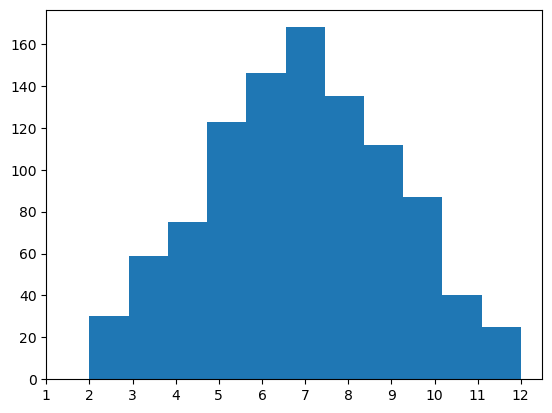

In [24]:
import matplotlib.pyplot as plt
plt.hist(dist_sum(1000),bins = 11)
plt.xticks(np.arange(1, 13)) # set the xaxis ticks to show all the numbers from 1 to 12
plt.show()

Obtaining sum of 7 has the highest frequency, which correlates to our understanding that obtaining 7 has the highest probability.

###  Example 4: Create a distribution for the number of flips before head is obtained
How do you expect the distribution to look like?

In [25]:
import random
coin = ["head", "tail"]
random.choice(coin)

'head'

In [26]:

def flips(n):
    tries = []                           # stores number of tries before head obtained
    coin = ["head", "tail"]
    for i in range(n):                   # repeated n times
        count = 0                        # start the count on each loop
        while(True):
            toss = random.choice(coin) # gets head or tail
            if(toss != 'head'):
                count+=1                 # continue the loop so long as it's not a head
            else:
                break                    # if its a head exit the while loop
        tries.append(count)              # append that count into tries array
    return tries

In [27]:
no_of_tries = flips(1000)
max(no_of_tries)

12

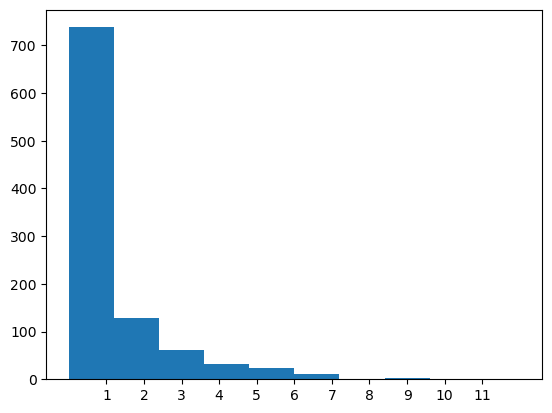

In [28]:
plt.hist(no_of_tries, bins =10)
plt.xticks(np.arange(1, max(no_of_tries)))
plt.show()

Approximately half of the tries get "head" on first try, which is what we expect of an unbiased die. There are some instances that up to 7,8,9,10 ... tries are needed before "head" is obtained, but those occurances has very low probability.

[Back to top](#contentpage)

<a id="c"></a>
##  3. Conditional probability

Calculate the Conditional probabilty given the following:

|        |         | credit rating |     |
|--------|---------|------|-----|
| status |         | good | bad |
|        | approved| 8    | 6   |
|        | denied  | 2    | 6   |

(i) P(loan is approved | credit rating is good)

(ii) P(loan is denied | credit rating is good)

(iii) P(credit rating is bad | loan is denied)

In [29]:
# Ans (i):
prob = 8 / (8+2)
print(f"P(loan is approved | credit rating is good) = {prob}")

P(loan is approved | credit rating is good) = 0.8


In [30]:
# Ans (ii):
prob = 2 / (8 + 2)
print(f"P(loan is denied | credit rating is good) = {prob}")

P(loan is denied | credit rating is good) = 0.2


In [31]:
# Ans (iii):
prob = 6 / (6+2)
print(f"P(credit rating is bad | loan is denied) = {prob}")

P(credit rating is bad | loan is denied) = 0.75


[Back to top](#contentpage)

<a id="d"></a>
##  4. Bayes' Law

[Back to top](#contentpage)

In [32]:
# Sam is often late, in order to analyze his behavior, records were taken down.
sam = pd.read_csv("./data/lateness.csv")
sam.head()

,late,rain
0,True,True
1,True,False
2,False,True
3,False,False
4,True,True


In [33]:
# calculate the unconditional probability of Sam being late
p_late = sam['late'].mean() # true = 1, false = 0
p_late

0.43333333333333335

In [34]:
# calculate the unconditional probability of rain
p_rain = sam['rain'].mean()
p_rain

0.8

In [35]:
# calculate the probability of there being rain given Sam is late 
p_rain_given_late = sam.loc[sam['late']]['rain'].mean()
p_rain_given_late

0.6538461538461539

Using the Bayes' Law:
P(A|B) = $\frac{P(B|A)xP(A)) }{P(B)}$,, Calculate the probability of Sam being late, given that it rained.

In [36]:
# calculate the probability of Sam being late given that it rained
p_late_given_rain = p_rain_given_late*p_late/p_rain
p_late_given_rain

0.35416666666666663

In [37]:
# check your answer since the data is available
sam.loc[sam['rain']]['late'].mean()

0.3541666666666667

[Back to top](#contentpage)